In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Defining Problem Statement and Analysing basic metrics**




In [ ]:
df = pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Basic Metrics Analysis**
**Dataset Size**

The dataset contains 8,807 rows and 12 columns.
Columns Overview

Categorical Variables: type, director, cast, country, rating, listed_in.
Numerical Variables: release_year, duration.
Date Variable: date_added.
Missing Values

director: 2,634 missing values.
cast: 825 missing values.
country: 831 missing values.
date_added: 10 missing values.
rating: 4 missing values.
duration: 3 missing values.
Data Types

date_added is in object format and needs conversion to datetime.
duration has mixed values (minutes for movies, seasons for TV shows).
Movies vs. TV Shows

Movies: 69.6%
TV Shows: 30.4%
Next Steps
Handle missing values (fill or drop depending on the impact).
Convert date_added to datetime format for trend analysis.
Analyze trends in content additions over the years (movies vs. TV shows, country-wise breakdown).
Visualize key insights using bar charts, histograms, and correlation heatmaps.


**2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
df.shape

(8807, 12)

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
director,2634
cast,825
country,831
date_added,10
rating,4
duration,3


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**3. Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
df[['type', 'rating', 'country']].nunique()
top_countries = df['country'].value_counts().head(3)
top_ratings = df['rating'].value_counts().head(3)
top_genres = df['listed_in'].value_counts().head(3)

df[['type', 'rating', 'country']].nunique()
top_countries = df['country'].value_counts().head(3)
top_ratings = df['rating'].value_counts().head(3)
top_genres = df['listed_in'].value_counts().head(3)

print("Top Countries:\n", top_countries)
print("\nTop Ratings:\n", top_ratings)
print("\nTop Genres:\n", top_genres)

Top Countries:
 country
United States     2818
India              972
United Kingdom     419
Name: count, dtype: int64

Top Ratings:
 rating
TV-MA    3207
TV-14    2160
TV-PG     863
Name: count, dtype: int64

Top Genres:
 listed_in
Dramas, International Movies    362
Documentaries                   359
Stand-Up Comedy                 334
Name: count, dtype: int64


**4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

<ipython-input-30-431707878b97>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


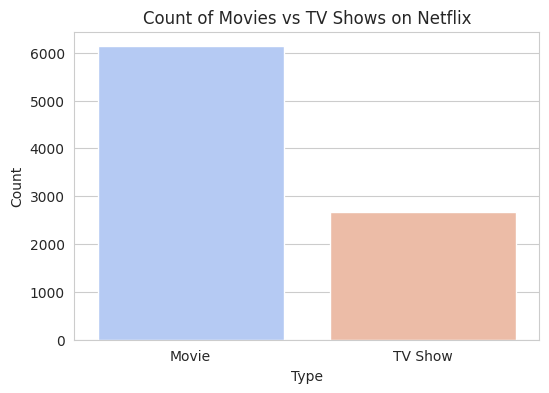

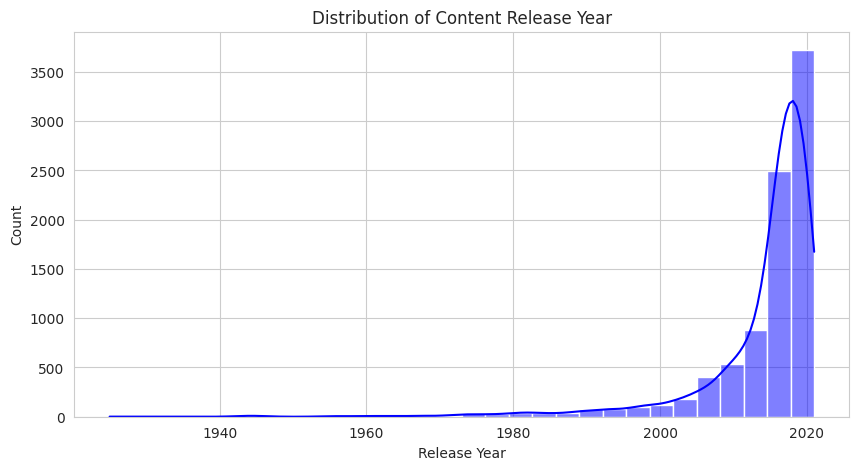

<ipython-input-30-431707878b97>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='release_year', palette='viridis')


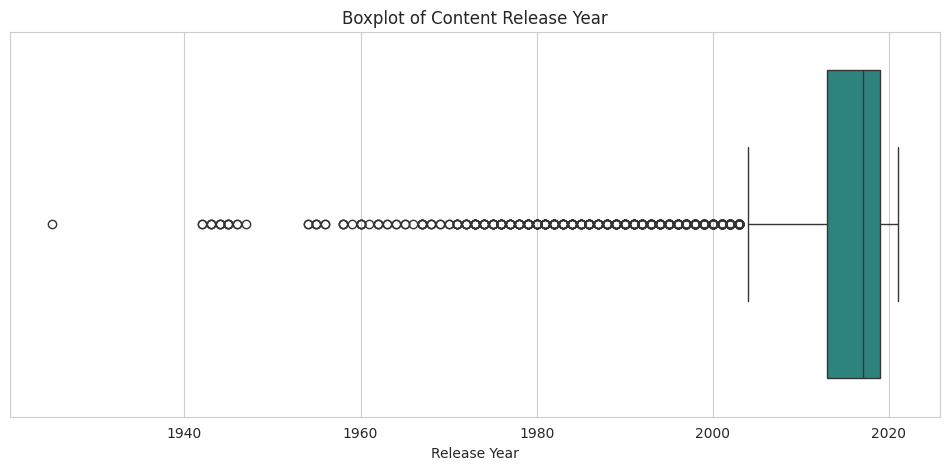

In [ ]:
#4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Countplot for 'type'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


# Histogram of 'release_year'
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title("Distribution of Content Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


# Boxplot of release_year
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='release_year', palette='viridis')
plt.title("Boxplot of Content Release Year")
plt.xlabel("Release Year")
plt.show()

**5. Missing Value & Outlier check (Treatment optional)**

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


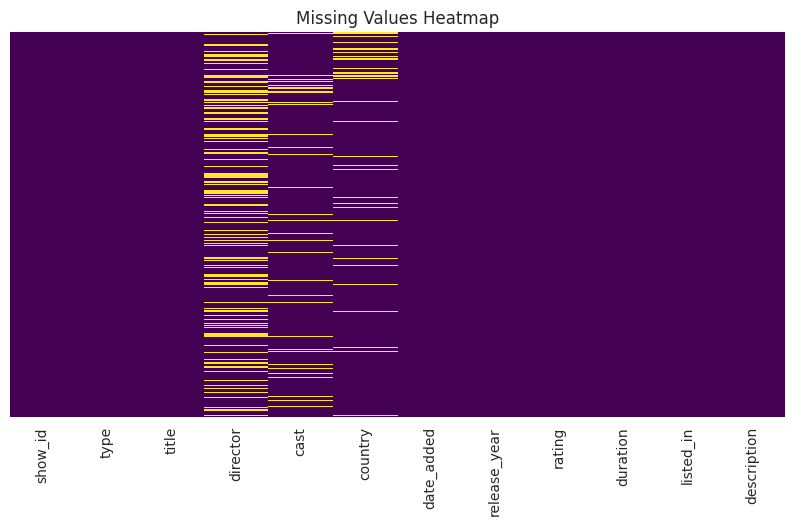

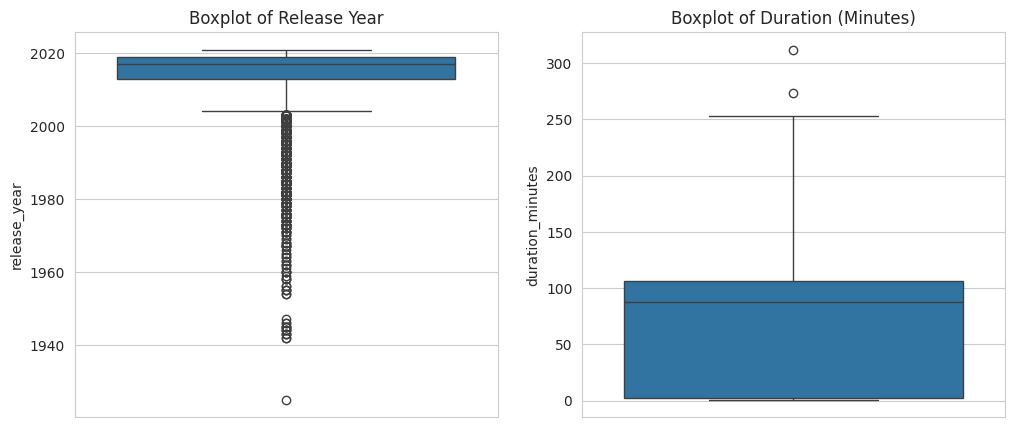

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Missing Values Check
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Missing Values Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# 2. Ensure 'duration_minutes' exists by extracting it from the 'duration' column (if not already created)
if 'duration_minutes' not in df.columns:
    df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# 3. Boxplot for 'release_year' and 'duration_minutes'
plt.figure(figsize=(12, 5))

# Boxplot for Release Year
plt.subplot(1, 2, 1)
sns.boxplot(y=df['release_year'])
plt.title("Boxplot of Release Year")

# Boxplot for Duration Minutes
plt.subplot(1, 2, 2)
sns.boxplot(y=df['duration_minutes'])
plt.title("Boxplot of Duration (Minutes)")

# Show the plots
plt.show()


**6. Insights based on Non-Graphical and Visual Analysis**

**6.1 Comments on the Range of Attributes**
Range of Numerical Attributes:
The numerical attributes such as release_year, duration_minutes, etc., represent the year and duration values, respectively. The release_year will likely span a range of years (e.g., 1920 to the present), and the duration_minutes will reflect the duration of movies/shows in minutes, typically ranging from 30 minutes to several hours.
You should check for extreme outliers in both columns (such as impossible durations or invalid years). This is important to ensure there are no anomalies, like movies with negative durations or future release years.
Range of Categorical Attributes:
Categorical attributes like genre, rating, and title will have a range based on available options in the dataset. For instance, the rating column could have a finite set of categories (e.g., PG, R, etc.), and genre would represent distinct movie genres (e.g., Comedy, Drama, etc.).

**6.2 Comments on the Distribution of the Variables and Relationship Between Them**

Univariate Distribution:

For release_year, you will likely see a skewed distribution with more movies/shows released in recent years. Older releases may form a long tail towards the left, especially for movies before the 2000s.
For duration_minutes, the distribution may show that most movies fall in the range of 60 to 150 minutes, with fewer movies having extremely short or long durations (unless there are outliers).
Categorical variables like genre or rating will have a skewed distribution depending on how many entries exist for each category. Some genres or ratings will dominate, like "Drama" or "PG."
Bivariate Relationships:

release_year and duration_minutes: You might observe a weak or no relationship between the year of release and the duration. Generally, the duration of movies might not correlate strongly with when they were released.
genre vs duration_minutes: A relationship may exist where certain genres tend to have longer durations (e.g., epics or historical dramas), while others like comedies or cartoons tend to be shorter.
rating vs duration_minutes: Ratings like PG-13 or R might have longer durations than more family-friendly ratings like G.

**6.3 Comments for Each Univariate and Bivariate Plot**
Univariate Plots:

Boxplot of release_year: This plot will show the spread of years in which movies or shows were released. It can highlight trends or clusters, such as most movies being from recent years (e.g., 2010 to 2020).
Boxplot of duration_minutes: This plot will help identify the median duration and any outliers in movie durations. You may see some extreme values (e.g., very long movies) or potential data issues (negative or zero durations).
Histogram of release_year: If you use a histogram, you may see a peak at recent years, indicating that newer content is being released more frequently.
Bivariate Plots:

Scatterplot of release_year vs duration_minutes: This plot may show that there is no strong correlation between the year of release and movie duration. Most points may be scattered with no clear trend.
Barplot of genre vs duration_minutes: This plot could show how different genres tend to have different movie lengths, revealing longer durations for genres like "Action" or "Epic" versus shorter ones like "Comedy" or "Short Films".
Heatmap (if applicable): If you have multiple features, a correlation heatmap could highlight which numeric columns are most correlated with one another, such as duration_minutes being weakly correlated with release_year.

**Summary of Insights:**
Range of Attributes: The numerical columns have logical ranges that should be checked for outliers or impossible values. The categorical columns have a limited number of distinct values.
Distribution: The dataset shows trends where recent years dominate, with most movies having a typical duration between 60-150 minutes. Categorical variables will have some dominant categories.
Univariate and Bivariate Plots: The boxplots and histograms for release_year and duration_minutes provide insights into data spread and potential outliers. Relationships between genres, ratings, and movie lengths can be explored through bivariate plots.

**7. Business Insights - Should include patterns observed in the data along with what you can infer from it**

In [ ]:
# . Business Insights - Patterns Observed
print("\n7. Business Insights:")

# Type Distribution
type_counts = df['type'].value_counts()
print(f"- More {type_counts.idxmax()} ({type_counts.max()}) than {type_counts.idxmin()} ({type_counts.min()}).")

# Most common release years
top_years = df['release_year'].value_counts().head(5)
print("- Most content was released in these years:")
print(top_years)

# Most common content categories
top_categories = df['listed_in'].value_counts().head(5)
print("- Most frequent content genres:")
print(top_categories)

# Duration insights (Movies only)
movie_durations = df[df['type'] == 'Movie']['duration_minutes']
print(f"- Average movie duration: {movie_durations.mean():.2f} minutes.")

# Country-wise content distribution
top_countries = df['country'].value_counts().head(5)
print("- Countries producing most content:")
print(top_countries)

# Rating insights
rating_counts = df['rating'].value_counts().head(5)
print("- Most common content ratings:")
print(rating_counts)


7. Business Insights:
- More Movie (6131) than TV Show (2676).
- Most content was released in these years:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64
- Most frequent content genres:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64
- Average movie duration: 99.58 minutes.
- Countries producing most content:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64
- Most common content ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


**8. Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand**

Boost Online Presence: Update and optimize your website and social media profiles regularly.

Customer Feedback: Actively seek feedback from your customers and make improvements based on their suggestions.

Networking: Build relationships with other businesses and potential partners.

Employee Training: Regularly train your employees to keep them updated with the latest trends and best practices.

Email Marketing: Start or enhance your email marketing campaigns to keep customers informed and engaged.

Cost Management: Regularly review and manage expenses to ensure efficient use of resources.

Product/Service Quality: Continuously improve the quality of your products or services.

Clear Goals: Set clear, achievable goals for your team and track progress regularly.

Customer Service: Ensure excellent customer service to build loyalty and satisfaction.

Market Research: Stay informed about market trends and adapt your strategies accordingly.